In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import os
from pathlib import Path
curr_dir = Path(os.getcwd())
data_dir = file_path = curr_dir / 'train_FD001_phase_1.csv'
df = pd.read_csv(data_dir, delimiter=",")

In [14]:
df.head()

,Unnamed: 0,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Stage
0,0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
1,1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
2,2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
3,3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
4,4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0


In [21]:
df = df.drop('Unnamed: 0', axis = 1)

In [22]:
df.head()

,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Stage
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0


In [23]:
cols = df.columns.tolist()

In [32]:
##Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00      1103
           3       1.00      1.00      1.00       590
           4       1.00      1.00      1.00       414

    accuracy                           1.00      4126
   macro avg       1.00      1.00      1.00      4126
weighted avg       1.00      1.00      1.00      4126



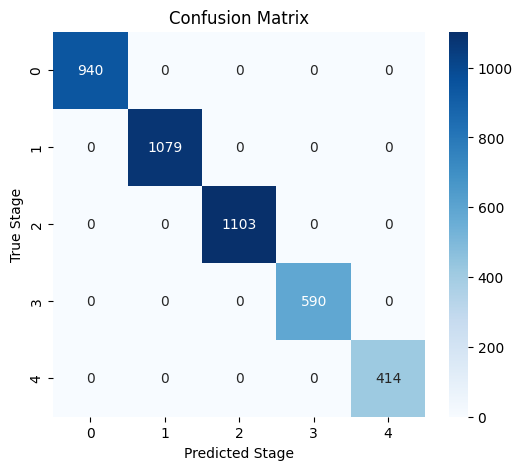

Cross-validated accuracy: 0.9999030538051382


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X = df[cols]
y = df['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validated accuracy:", scores.mean())


In [ ]:
##Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       940
           1       0.91      0.87      0.89      1079
           2       0.91      0.83      0.87      1103
           3       0.81      0.85      0.83       590
           4       0.90      0.98      0.94       414

    accuracy                           0.89      4126
   macro avg       0.89      0.90      0.89      4126
weighted avg       0.89      0.89      0.89      4126



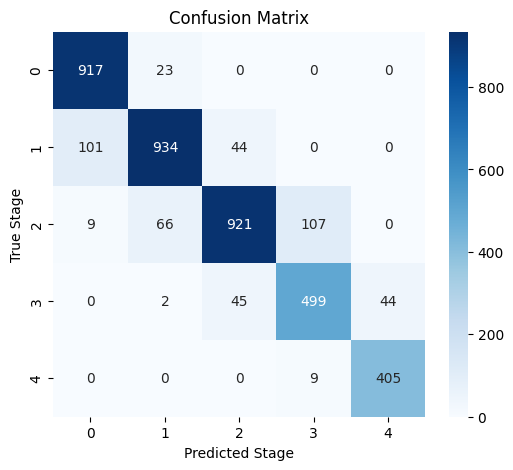

Cross-validated accuracy: 0.8805622879301988


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = df[cols]
y = df['Stage']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

clf_lr = LogisticRegression(class_weight='balanced', penalty='l2', C=0.001, random_state=42)
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix")
plt.show()


from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_lr, X_scaled, y, cv=5)
print("Cross-validated accuracy:", scores.mean())

In [ ]:
## SVM

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.97      0.96      0.97      1079
           2       0.97      0.95      0.96      1103
           3       0.94      0.90      0.92       590
           4       0.92      0.98      0.95       414

    accuracy                           0.96      4126
   macro avg       0.95      0.96      0.95      4126
weighted avg       0.96      0.96      0.96      4126



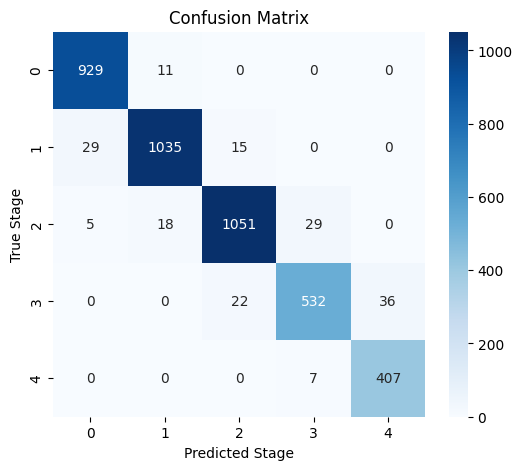

Cross-validated accuracy: 0.9534658264663112


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = df[cols]
y = df['Stage']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

clf_svm = SVC(class_weight='balanced',C = 0.02, random_state=42)
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, X_scaled, y, cv=5)
print("Cross-validated accuracy:", scores.mean())